# Demonstration to Convert Anisotropy (Spherical Harmonics) from GEO to GSE coordinate system

In [1]:
import pandas as pd

In [2]:
#Self-made module to convert the coordinate system. Key libraries imported are pyspedas and pyshtools. See comment out in the code.
from my_modules.geo_to_gse import geo_to_gse

Make a DataFrame for demonstration. "XC.n.m" represent a cosine component of expansion coefficients of the (n,m) order spherical harmonics. "XS.n.m" is a sine component.

In [3]:
times = ['2022-02-05','2022-03-20','2022-05-05','2022-06-20','2022-08-05','2022-09-20','2022-11-05','2022-12-20','2023-02-05']
times = list(map(pd.to_datetime, times))
nt = len(times)
keys = ['XC.0.0','XC.1.0','XC.1.1','XS.1.1','XC.2.0','XC.2.1','XS.2.1','XC.2.2','XS.2.2']
dict_xc = {}
for key in keys:
    dict_xc[key] = [0]*nt
dict_xc['XC.1.0'] = [1]*nt
dict_xc['XC.2.0'] = [1]*nt

In [4]:
data_geo = pd.DataFrame(dict_xc, index=times)
data_geo

,XC.0.0,XC.1.0,XC.1.1,XS.1.1,XC.2.0,XC.2.1,XS.2.1,XC.2.2,XS.2.2
2022-02-05,0,1,0,0,1,0,0,0,0
2022-03-20,0,1,0,0,1,0,0,0,0
2022-05-05,0,1,0,0,1,0,0,0,0
2022-06-20,0,1,0,0,1,0,0,0,0
2022-08-05,0,1,0,0,1,0,0,0,0
2022-09-20,0,1,0,0,1,0,0,0,0
2022-11-05,0,1,0,0,1,0,0,0,0
2022-12-20,0,1,0,0,1,0,0,0,0
2023-02-05,0,1,0,0,1,0,0,0,0


Convert coordinate system.

In [5]:
data_gse = geo_to_gse(data_geo)

2022/02 2022/03 2022/05 2022/06 2022/08 2022/09 2022/11 2022/12 2023/02 Finished!


In [6]:
data_gse

,XC.1.0,XC.1.1,XS.1.1,XC.2.0,XC.2.1,XS.2.1,XC.2.2,XS.2.2,XC.0.0
2022-02-05,0.917502,-0.275520,0.286843,0.762715,-0.437845,0.455839,-0.005515,-0.136885,0
2022-03-20,0.917502,-0.004433,0.397706,0.762715,-0.007045,0.632019,-0.136962,-0.003054,0
2022-05-05,0.917502,0.278759,0.283695,0.762716,0.442992,0.450838,-0.002405,0.136975,0
2022-06-20,0.917502,0.397624,0.009173,0.762716,0.631889,0.014577,0.136850,0.006317,0
2022-08-05,0.917503,0.292845,-0.269130,0.762716,0.465377,-0.427691,0.011542,-0.136509,0
2022-09-20,0.917503,0.020639,-0.397194,0.762717,0.032799,-0.631205,-0.136258,-0.014199,0
2022-11-05,0.917503,-0.268950,-0.293009,0.762717,-0.427405,-0.465639,-0.011709,0.136494,0
2022-12-20,0.917503,-0.397502,-0.013430,0.762717,-0.631695,-0.021342,0.136683,0.009246,0
2023-02-05,0.917503,-0.276748,0.285655,0.762718,-0.439797,0.453952,-0.004338,-0.136926,0


<AxesSubplot: >

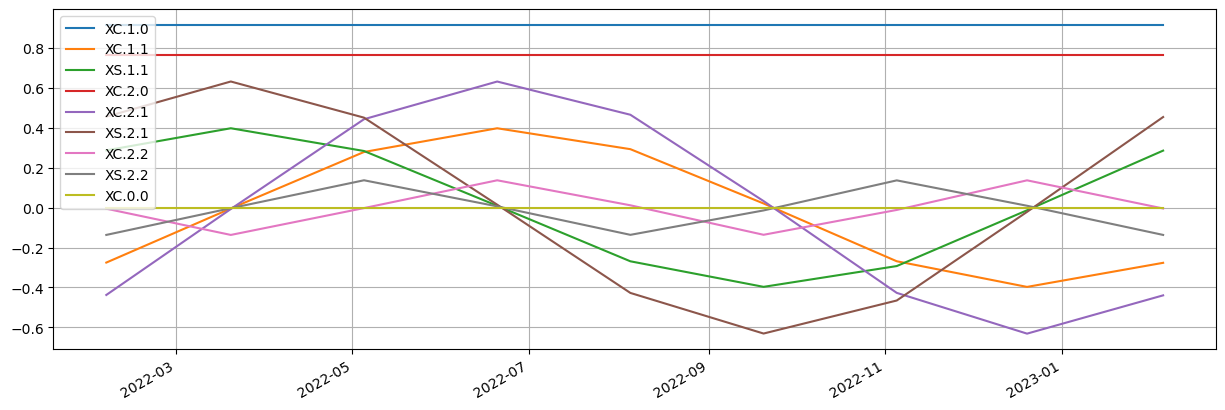

In [7]:
data_gse.plot(figsize=(15,5),grid=True)

The 1st and 2nd harmonics anisotropy constant in GEO (x-axis is fixed to 0h LT) cause an annual and biannual variations in GSE respectively.